In [13]:
## import dependenacies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import flask
from flask import request
from flask_cors import CORS
from sqlalchemy import create_engine

ModuleNotFoundError: No module named 'sqlalchemy'

In [117]:
#### Read the csv file into a pandas DataFrame
##Dataset:  categorical.csv

df = pd.read_csv("activities.csv")
df.head(10)

,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate,rate_sleep
0,bath,tv,1,frequently,bedtime,yes,school_performance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,quality_of_life,7,ok
4,read,computer,5,sometimes,on_off,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extra lessons,5,bad
6,alcohol,mp3,7,frequently,music_late,yes,send_read_textinbed,4,bad
7,talking_to_spouse,music_gadgets,8,sometimes,games_late,no,pets,3,bad
8,medication,Unknown,9,never,devices_late,yes,lighting_temp,2,bad


In [118]:
df_copy = df.copy()
df_copy['rate_sleep'] = df_copy['rate'].rank()
df_copy

,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate,rate_sleep
0,bath,tv,1,frequently,bedtime,yes,school_performance,10,9.0
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,8.0
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,7.0
3,pray,videogame,4,frequently,textinbed,no,quality_of_life,7,6.0
4,read,computer,5,sometimes,on_off,yes,active,6,5.0
5,exercise,laptop,6,never,homework_late,no,extra lessons,5,4.0
6,alcohol,mp3,7,frequently,music_late,yes,send_read_textinbed,4,3.0
7,talking_to_spouse,music_gadgets,8,sometimes,games_late,no,pets,3,2.0
8,medication,Unknown,9,never,devices_late,yes,lighting_temp,2,1.0


In [119]:
df = pd.read_csv("activities.csv")
df.head(10)

,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate,rate_sleep
0,bath,tv,1,frequently,bedtime,yes,school_performance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,quality_of_life,7,ok
4,read,computer,5,sometimes,on_off,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extra lessons,5,bad
6,alcohol,mp3,7,frequently,music_late,yes,send_read_textinbed,4,bad
7,talking_to_spouse,music_gadgets,8,sometimes,games_late,no,pets,3,bad
8,medication,Unknown,9,never,devices_late,yes,lighting_temp,2,bad


In [120]:
df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate,rate_sleep
0,bath,tv,1,frequently,bedtime,yes,school_performance,10,good
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9,good
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8,good
3,pray,videogame,4,frequently,textinbed,no,quality_of_life,7,ok
4,read,computer,5,sometimes,on_off,yes,active,6,ok
5,exercise,laptop,6,never,homework_late,no,extra lessons,5,bad
6,alcohol,mp3,7,frequently,music_late,yes,send_read_textinbed,4,bad
7,talking_to_spouse,music_gadgets,8,sometimes,games_late,no,pets,3,bad
8,medication,Unknown,9,never,devices_late,yes,lighting_temp,2,bad


In [ ]:
#  create database connection
connection_string = "postgres:Prav123@localhost:5432/Industry_db"
engine = create_engine(f'postgresql://{connection_string}')

In [133]:
df.shape

(9, 9)

In [134]:
X = df.loc[:,['activities','devicesBR','devices_count','usage','Rules','enforce','behaviour','rate']]
y = df.rate_sleep

In [135]:
X.head()

,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate
0,bath,tv,1,frequently,bedtime,yes,school_performance,10
1,music,smartphone,2,sometimes,wakeuptime,no,mood,9
2,sex,ipad_tablet,3,never,dinnertime,yes,behaviour,8
3,pray,videogame,4,frequently,textinbed,no,quality_of_life,7
4,read,computer,5,sometimes,on_off,yes,active,6


In [136]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['activities','devicesBR','devices_count','usage','Rules','enforce','behaviour','rate']]= \
X.loc[:,['activities','devicesBR','devices_count','usage','Rules','enforce','behaviour','rate']].apply(enc.fit_transform)

In [137]:
X.head()


,activities,devicesBR,devices_count,usage,Rules,enforce,behaviour,rate
0,1,7,0,0,0,1,7,8
1,4,6,1,2,8,0,4,7
2,7,2,2,1,2,1,1,6
3,5,8,3,0,7,0,6,5
4,6,1,4,2,6,1,0,4


In [138]:
y.head()

0    good
1    good
2    good
3      ok
4      ok
Name: rate_sleep, dtype: object

<AxesSubplot:>

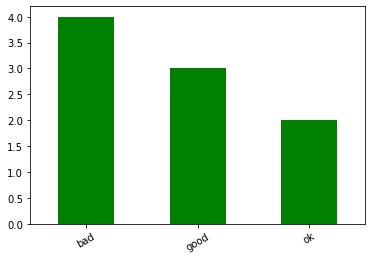

In [139]:
##Barplot to visualize the number of samples for each category in the target variable
df['rate_sleep'].value_counts().plot.bar( rot=30, color="green", width=0.5)

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [141]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [143]:
model.fit(X, y)

DecisionTreeClassifier()

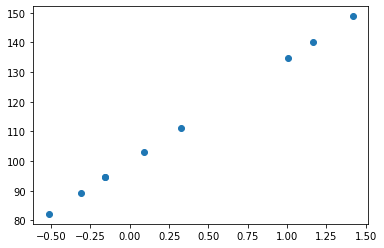

In [144]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=9, n_features=1, bias=100)
plt.scatter(X, y)

In [ ]:
###The response or output is directly proportional to the input We can see from the data that we have a linear trend in our model. 
# (The response or output is directly proportional to the input) We can use Linear Regression to fit a line through the data.

In [145]:
##Is bath, often, mean rating good ?

model.predict([[1,7,0,0,0,1,7,8]])

array(['good'], dtype=object)

In [147]:
##having 5 devices in BR, is it good or bad ?

model.predict([[6,1,4,2,6,1,0,4]])


array(['ok'], dtype=object)

In [148]:
### Extracting model for flask
import joblib
model = joblib.dump(model,'sleep_analysis.ml')